# problem statement
Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
#Count of animals in particular type
data.groupby(["type"],sort=False)[["animal name"]].count()

,animal name
type,
1,41
4,13
2,20
7,10
6,8
5,4
3,5


In [5]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Text(0.5, 1.0, 'Features for the Animals')

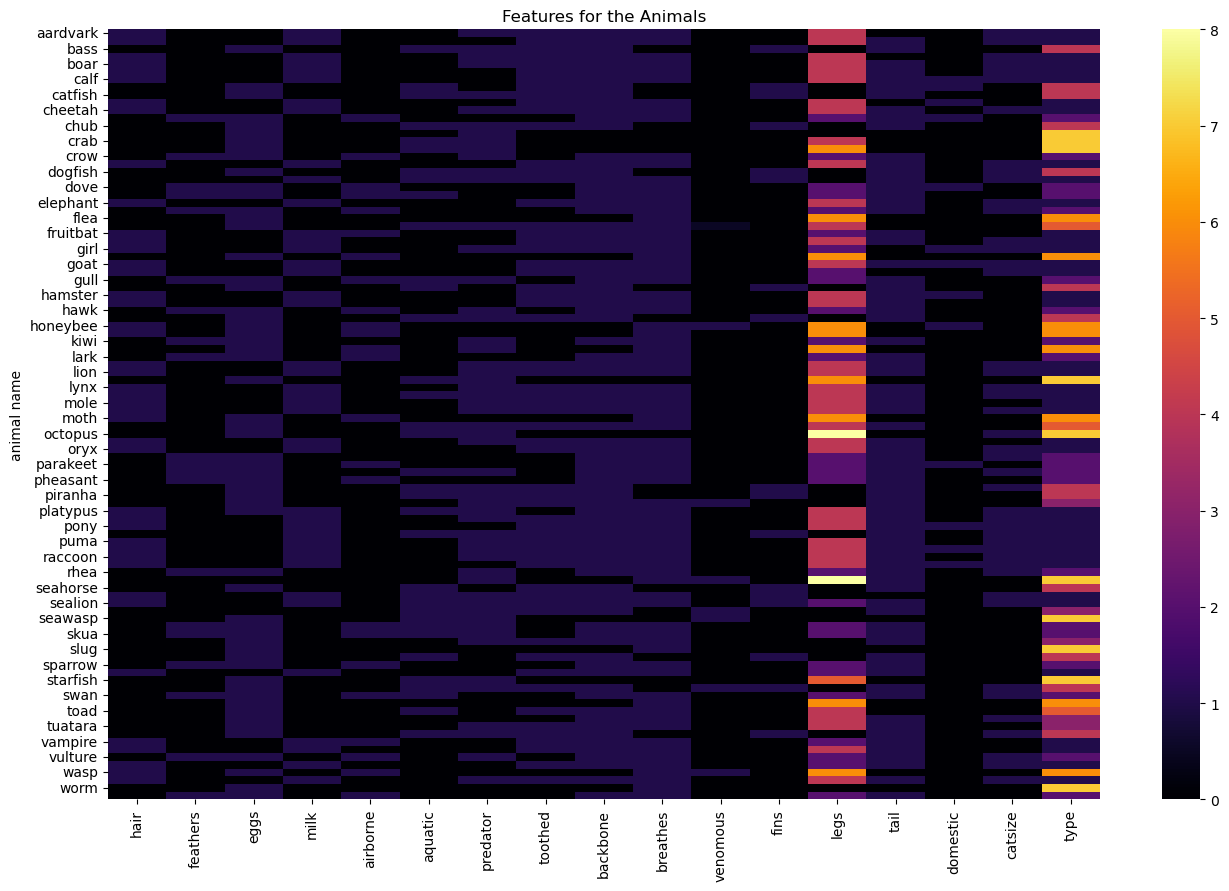

In [6]:
data_temp = data.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(data_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

C:\Users\ubed shaikh\AppData\Local\Temp\ipykernel_13112\4259556780.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = data.groupby(by='type').mean()


Text(0.5, 1.0, 'HeatMap of Features for the Classes')

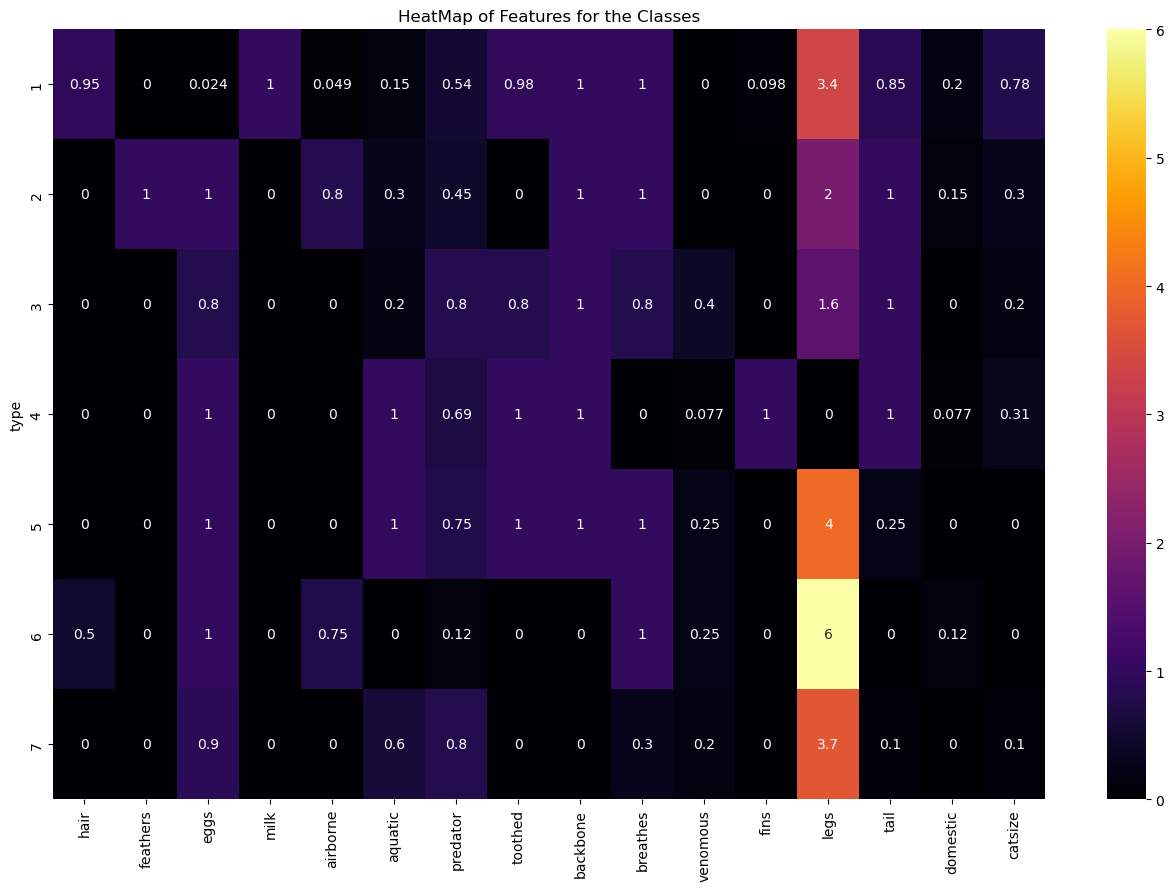

In [7]:
#Here we can see how legs having a larger range of values [0-8] than the rest of the features the data.
data_temp = data.groupby(by='type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(data_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [8]:
#Saprate the features & class of the data
X=data.iloc[:,1:17].values
y=data['type']

# Train model
Create and train knn classifier to use on data

In [9]:
# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [10]:
# Fit k-nearest neighbors classifier with training sets for n = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Test and Evaluate model
Predicitions on the test data

In [11]:
y_pred = knn.predict(X_test)

In [12]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.93      0.96      0.94        26



C:\Users\ubed shaikh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ubed shaikh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ubed shaikh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


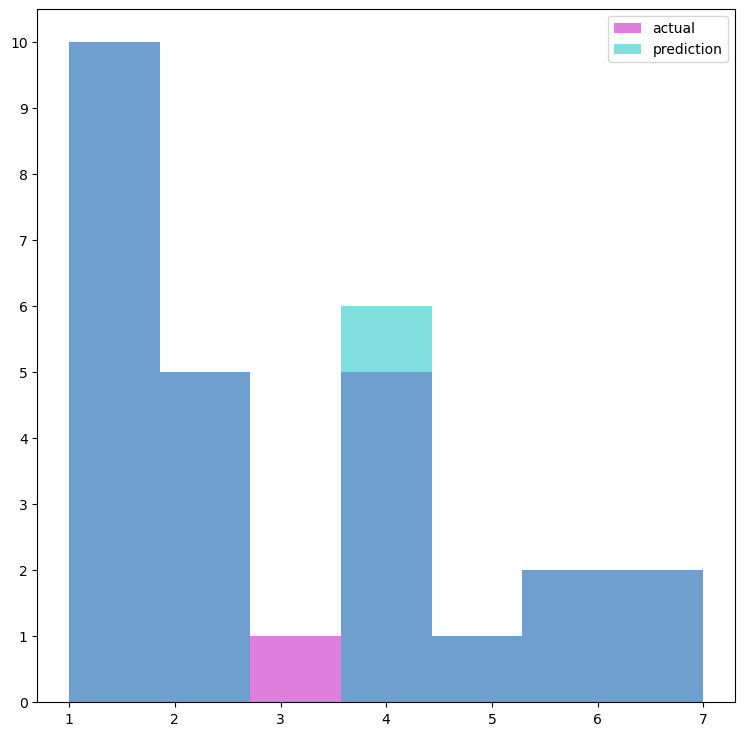

In [14]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()


In [15]:
# Get score for different values of n
import warnings
warnings.simplefilter("ignore")
k_list = np.arange(1, 50, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score = cross_val_score(knn,X_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

Mean Scores:
[0.9178571428571429, 0.9303571428571429, 0.8232142857142858, 0.7714285714285714, 0.7714285714285714, 0.7714285714285714, 0.7589285714285714, 0.7589285714285714, 0.7464285714285713, 0.6946428571428571, 0.6535714285714286, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5607142857142857, 0.5214285714285714, 0.5107142857142857, 0.5232142857142856, 0.48392857142857143, 0.4428571428571429, 0.41428571428571426, 0.41428571428571426, 0.41428571428571426]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]


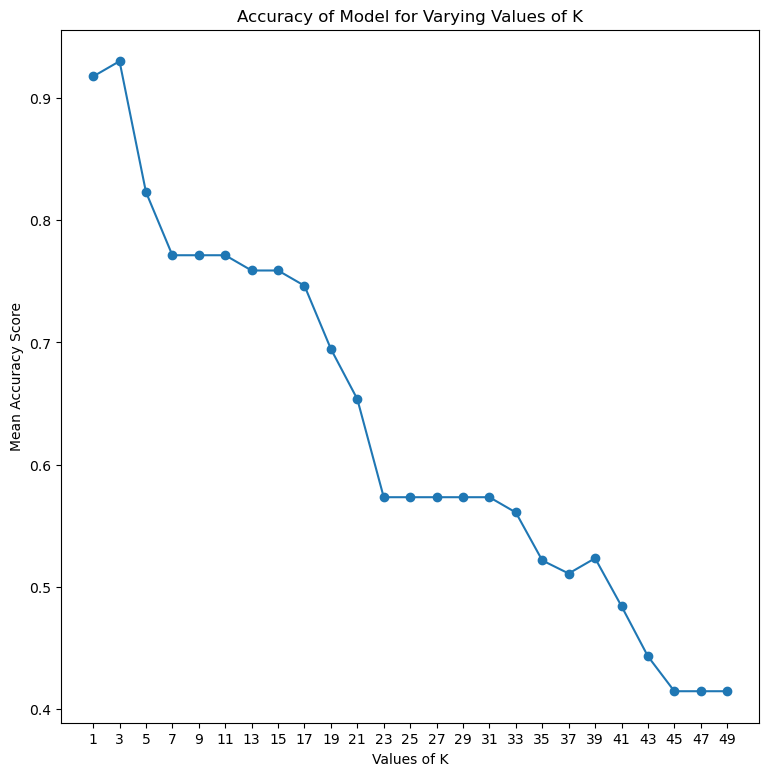

In [16]:
# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, marker='o')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (5,5) 

plt.show()

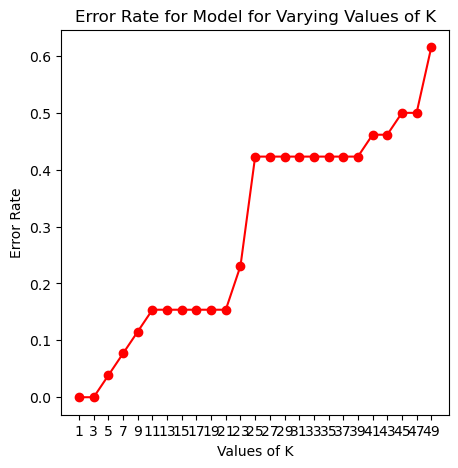

In [17]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()